<a href="https://colab.research.google.com/github/BCIs-maniac81/AI_and_DeepLearning/blob/main/regression_deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Deep Learning : Regression**
***Predict Fuel Efficiency***

In [1]:
from __future__ import print_function, division, absolute_import

In [2]:
import keras

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from keras.models import Sequential
from keras.layers import Dense

In [5]:
import tensorflow

In [6]:
dataset_path = tensorflow.keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 0us/step


'/root/.keras/datasets/auto-mpg.data'

In [7]:
column_names = ["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration", "Model Year", "Origin"]
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values='?', comment='\t', sep=" ", skipinitialspace=True)

In [8]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [9]:
# Clean the data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
dataset = dataset.dropna()

In [11]:
origin = dataset.pop("Origin")

In [19]:
print(type(origin))

<class 'pandas.core.frame.DataFrame'>


In [12]:
origin = origin.to_frame()

In [13]:
origin.head()

,Origin
0,1
1,1
2,1
3,1
4,1


In [14]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [15]:
dataset["USA"] = (origin == 1) * 1.0
dataset["Europe"] = (origin == 2) * 1.0
dataset["Japan"] = (origin == 3) * 1.0

In [16]:
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [17]:
# Split data
from sklearn.model_selection import train_test_split

In [18]:
splitted_data = train_test_split(dataset, test_size=0.2, random_state=0)
print(type(splitted_data))

<class 'list'>


In [19]:
print(len(splitted_data))

2


In [20]:
train_dataset = splitted_data[0]
test_dataset = splitted_data[1]

In [21]:
print(train_dataset.shape)
print(test_dataset.shape)

(313, 10)
(79, 10)


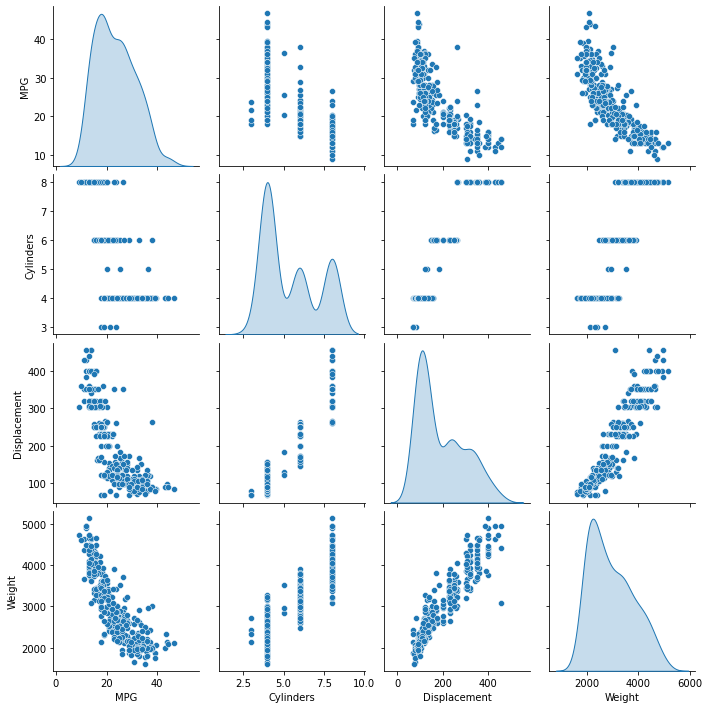

In [22]:
# inspect data
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [32]:
train_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.447284,1.690263,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,192.787540,103.201153,68.0,105.0,151.0,260.0,455.0
Horsepower,313.0,104.009585,37.915348,46.0,78.0,95.0,120.0,230.0
Weight,313.0,2972.255591,841.134947,1613.0,2230.0,2815.0,3574.0,5140.0
Acceleration,313.0,15.560383,2.785476,8.0,13.6,15.5,17.0,24.8
Model Year,313.0,76.070288,3.660449,70.0,73.0,76.0,79.0,82.0
USA,313.0,0.623003,0.485410,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.169329,0.375643,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.207668,0.406287,0.0,0.0,0.0,0.0,1.0


In [24]:
train_stats["mean"]

MPG               23.482428
Cylinders          5.447284
Displacement     192.787540
Horsepower       104.009585
Weight          2972.255591
Acceleration      15.560383
Model Year        76.070288
USA                0.623003
Europe             0.169329
Japan              0.207668
Name: mean, dtype: float64

In [25]:
train_stats["std"]

MPG               7.784488
Cylinders         1.690263
Displacement    103.201153
Horsepower       37.915348
Weight          841.134947
Acceleration      2.785476
Model Year        3.660449
USA               0.485410
Europe            0.375643
Japan             0.406287
Name: std, dtype: float64

In [26]:
# Split Features from labels
# Separate the target value or label from features
train_labels = train_dataset.pop("MPG")
test_labels = test_dataset.pop("MPG")

In [27]:
train_dataset.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
325,4,90.0,48.0,2085.0,21.7,80,0.0,1.0,0.0
194,6,232.0,90.0,3085.0,17.6,76,1.0,0.0,0.0
118,4,116.0,75.0,2158.0,15.5,73,0.0,1.0,0.0
48,6,250.0,88.0,3139.0,14.5,71,1.0,0.0,0.0
174,6,171.0,97.0,2984.0,14.5,75,1.0,0.0,0.0


In [28]:
test_dataset.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
101,6,198.0,95.0,2904.0,16.0,73,1.0,0.0,0.0
65,8,351.0,153.0,4129.0,13.0,72,1.0,0.0,0.0
56,4,91.0,70.0,1955.0,20.5,71,1.0,0.0,0.0
262,8,305.0,145.0,3425.0,13.2,78,1.0,0.0,0.0
216,4,98.0,68.0,2045.0,18.5,77,0.0,0.0,1.0


In [29]:
train_labels.head()

220    33.5
256    20.5
301    34.2
193    24.0
57     24.0
Name: MPG, dtype: float64

In [30]:
test_labels.head()

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: MPG, dtype: float64

In [31]:
print(train_dataset.shape)
print(train_labels.shape)
print(test_dataset.shape)
print(test_labels.shape)

(313, 9)
(313,)
(79, 9)
(79,)


In [35]:
train_stats = train_dataset.describe().T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,313.0,5.447284,1.690263,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,192.787540,103.201153,68.0,105.0,151.0,260.0,455.0
Horsepower,313.0,104.009585,37.915348,46.0,78.0,95.0,120.0,230.0
Weight,313.0,2972.255591,841.134947,1613.0,2230.0,2815.0,3574.0,5140.0
Acceleration,313.0,15.560383,2.785476,8.0,13.6,15.5,17.0,24.8
Model Year,313.0,76.070288,3.660449,70.0,73.0,76.0,79.0,82.0
USA,313.0,0.623003,0.485410,0.0,0.0,1.0,1.0,1.0
Europe,313.0,0.169329,0.375643,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.207668,0.406287,0.0,0.0,0.0,0.0,1.0


In [36]:
# Normalize data
def normalize(x):
  return (x - train_stats["mean"])/train_stats["std"]

In [37]:
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [38]:
normed_train_data.shape

(313, 9)

In [39]:
normed_test_data.shape

(79, 9)

In [35]:
# Build the model

In [40]:
n_cols = len(normed_train_data.columns)
n_cols

9

In [41]:
def build_model():
  model = Sequential()
  model.add(Dense(units=64, activation='relu', input_shape=(n_cols,)))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1))
  optimizer=tensorflow.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=["mae", "mse"])
  return model

In [42]:
model = build_model()

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Try out the model with a batch of 10 examples and make prediction
example_batch = normed_train_data[:10]
example_batch.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
220,-0.856248,-1.044441,-0.896987,-1.221273,0.445029,0.253989,-1.283457,-0.450771,1.950178
256,0.327000,0.312133,-0.105751,0.544199,0.588631,0.527179,0.776656,-0.450771,-0.511135
301,-0.856248,-0.850645,-0.896987,-0.918111,-0.847390,0.800370,0.776656,-0.450771,-0.511135
193,0.327000,0.069887,-0.606867,0.047251,0.732233,-0.019202,0.776656,-0.450771,-0.511135
57,-0.856248,-0.773126,-0.237624,-0.825380,-0.021678,-1.111964,-1.283457,-0.450771,1.950178


In [45]:
example_result = model.predict(example_batch)
example_result

array([[-0.08077557],
       [ 0.00762043],
       [ 0.34248483],
       [-0.0049707 ],
       [ 0.08550506],
       [ 0.15924385],
       [-0.16208392],
       [ 0.1243257 ],
       [ 0.02813004],
       [ 0.00708099]], dtype=float32)

In [46]:
# train the model
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print("")
    print(".", end="")

EPOCHS = 1000

In [47]:
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [49]:
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,567.289612,22.513348,567.289612,569.456238,22.300337,569.456238,0
1,515.613525,21.314690,515.613525,517.497803,21.097845,517.497803,1
2,465.309052,20.070410,465.309052,461.741852,19.734695,461.741852,2
3,410.987885,18.677841,410.987885,400.619781,18.173065,400.619781,3
4,353.196899,17.080816,353.196899,336.748901,16.468733,336.748901,4


In [54]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(0)
  plt.xlabel("Epoch")
  plt.ylabel("Mean Abs Error [MPG]")
  plt.plot(hist["epoch"], hist["mae"], label="Train Error")
  plt.plot(hist["epoch"], hist["val_mae"], label="Validation Error")
  plt.legend()
  plt.ylim([0, 5])

  plt.figure(1)
  plt.xlabel("Epoch")
  plt.ylabel("Mean Square Error [$MPG^2$]")
  plt.plot(hist["epoch"], hist["mse"], label="Train Error")
  plt.plot(hist["epoch"], hist["val_mse"], label="Validation Error")
  plt.legend()
  plt.ylim([0, 20])

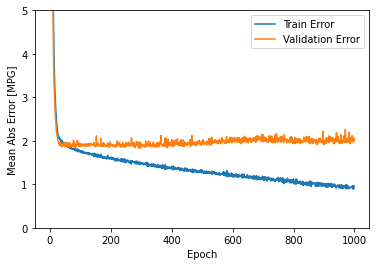

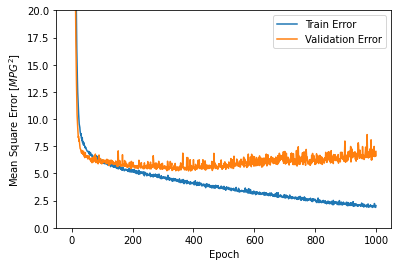

In [55]:
plot_history(history)

In [56]:
# There is an overfitting
model1 = build_model()

In [57]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [58]:
history1 = model1.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()]) 


....................................................................................................
.........

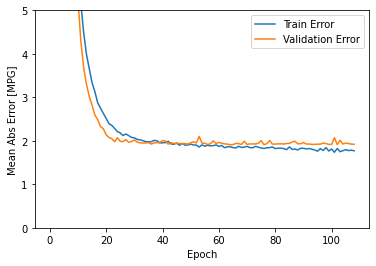

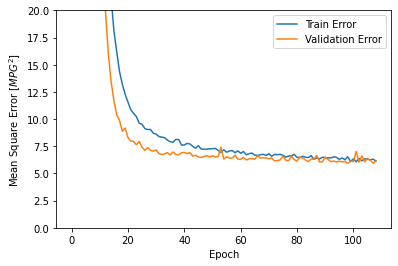

In [59]:
plot_history(history1)

In [60]:
# Let's see how well the model genralizes by using test set

In [62]:
loss, mae, mse = model1.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))
print("Testing set Mean square Error: {:5.2f} MPG".format(mse))

Testing set Mean Abs Error:  1.81 MPG
Testing set Mean square Error:  6.66 MPG


In [69]:
# Make predictions on test set
test_pred = model1.predict(normed_test_data).flatten()
test_pred[:5]

array([28.807945, 23.188831, 12.401467, 35.977737, 34.00072 ],
      dtype=float32)

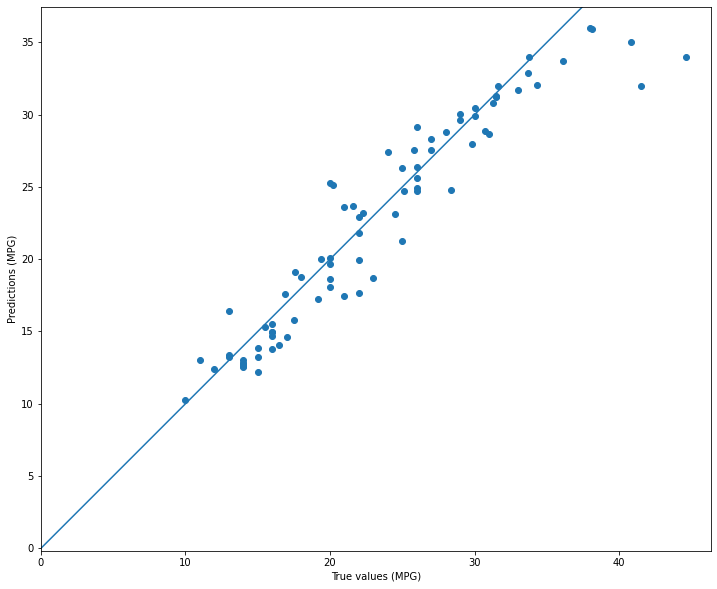

In [75]:
plt.figure(figsize=(12, 10))
plt.scatter(test_labels, test_pred)
plt.xlabel("True values (MPG)")
plt.ylabel("Predictions (MPG)")
plt.axis("equal")
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.plot([-100, 100], [-100, 100])
plt.show()

Text(0, 0.5, 'Count')

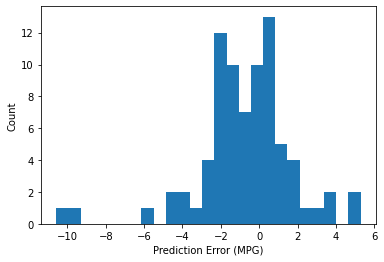

In [80]:
error = test_pred - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error (MPG)")
plt.ylabel("Count")